**Exercício 1**: Crie um `DataFrame` com 20 linhas e 3 colunas, onde

- uma coluna "x" possui números reais aleatórios entre 1 e 10
- uma coluna "y" possui os inteiros entre 0 e 19, em ordem
- uma coluna "z" categórica com o valor "Maior" onde $x > 4$ e "Menor" onde $x \leq 4$

Dica: a função `np.vectorize` pode ajudar a transformar um vetor de números em um de texto.

**Exercício 2**: calcule quantas linhas tem o valor z Maior e y é par

**Exercício 3**: calcule a média dos valores de x onde z é Menor

Para os próximos exercícios, utilize o código abaixo para importar a base de dados Iris em um DataFrame (não é necessário fazer `import`s que você já fez).

In [12]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

In [13]:
iris = load_iris()
dados = pd.DataFrame(iris.data, columns=['sepal length', 'sepal width', 'petal length', 'petal width'])

def classe(c):
  if c == 0:
    return 'Setosa'
  elif c == 1:
    return 'Versicolor'
  else:
    return 'Virginica'

dados['classe'] = pd.Categorical(np.vectorize(classe)(iris.target))
dados.head()

,sepal length,sepal width,petal length,petal width,classe
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


**Exercício 4**: Utilizando somente as variáveis "petal length" e "petal width", é possível com uma única reta separar perfeitamente uma das três classes? Responda gerando o gráfico de dispersão dessas variáveis, colocando os marcadores de cada classe com uma cor diferente.

Dica: lembre-se de usar o parâmetro `ax` para juntar os gráficos em uma única imagem.

**Exercício 5**: Chamamos de intervalo inter-quartil (_interquartile range_, IQR) a diferença entre o terceiro quartil (75%, $Q_3$) e o primeiro quartil (25%, $Q_1$): ${IQR} = Q_3 - Q_1$. Calcule o IQR das quatro variáveis da base Iris.

Dica: A função `describe` retorna um DataFrame onde ambos os índices são textuais.

In [14]:
# Exercicio 1

# Definindo a função para categorizar a coluna z
def acharz(x):
    if x > 4:
        return "Maior"
    else:
        return "Menor"
    
# Criando um vetor de tamanho 20 com valores aleatórios no intervalo [1,10], do tipo int64, c
x = np.random.randint(1,10,20, dtype = "int64")

# Criando um vetor em ordem, com passo 1, de 0 a 19(Ou [0,20[)
y = np.arange(0,20)

# Utilizando a função vectorize da biblioteca numpy, para categorizar o vetor z
z = np.vectorize(acharz)(x)

# Print dos vetores
print("X:",x)
print("Y:",y)
print("Z:",z)

X: [7 8 5 3 2 7 7 5 6 3 3 2 5 3 2 4 3 5 2 2]
Y: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
Z: ['Maior' 'Maior' 'Maior' 'Menor' 'Menor' 'Maior' 'Maior' 'Maior' 'Maior'
 'Menor' 'Menor' 'Menor' 'Maior' 'Menor' 'Menor' 'Menor' 'Menor' 'Maior'
 'Menor' 'Menor']


In [15]:
# Exercicio 2

# Criando a variavel contador e inicializando o seu valor para 0
contador = 0
# Para cada valor i na range do tamanho do vetor y
for i in range(len(y)):
    # Se o valor armazenado no vetor y de indice i for par E o o vetor z tem armazenado nessa posição "Maior", então
    #é adicionado mais 1 ao contador
    if (((y[i] % 2) == 0) and (z[i] == "Maior")):
        contador += 1
        
# Prints dos vetores
print(z)
print(y)

# Print do contador
print(contador)

['Maior' 'Maior' 'Maior' 'Menor' 'Menor' 'Maior' 'Maior' 'Maior' 'Maior'
 'Menor' 'Menor' 'Menor' 'Maior' 'Menor' 'Menor' 'Menor' 'Menor' 'Maior'
 'Menor' 'Menor']
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
5


In [16]:
# Exercício 3

# Calcula a média dos valores em que o vetor z tem o valor "Menor"
media = y[z == "Menor"].mean()
print(media)

12.0


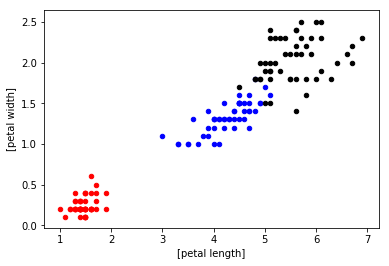

In [17]:
# Exercício 4

# Armazenando as plantas de mesmo tipo em classes diferentes.
classe1 = dados[dados['classe'] == 'Setosa']
classe2 = dados[dados['classe'] == 'Versicolor']
classe3 = dados[dados['classe'] == 'Virginica']

#Plotando no mesmo gráfico, no entanto, com cores diferentes, as diferentes plantas
ax = classe1.plot.scatter(['petal length'], ['petal width'], color = 'red')
classe2.plot.scatter(['petal length'], ['petal width'], color = 'blue', ax = ax)
classe3.plot.scatter(['petal length'], ['petal width'], color = 'black', ax = ax)

In [ ]:
# Exercício 5

# Calculando o IQR utilizando a função quantile da bibliotera pandas
IQRsl = dados['sepal length'].quantile(.75) - dados['sepal length'].quantile(.25)
IQRsw = dados['sepal width'].quantile(.75) - dados['sepal width'].quantile(.25)
IQRpl = dados['petal length'].quantile(.75) - dados['petal length'].quantile(.25)
IQRpw = dados['petal width'].quantile(.75) - dados['petal width'].quantile(.25)

# Armazenando no vetor plantas, a descrição dos dados
plantas = dados.describe()

# Utilizando os valores recebidos pela descrição para obter o IQR
iqrSepalLength = plantas['sepal length'][6] - plantas['sepal length'][4]
iqrSepalWidth = plantas['sepal width'][6] - plantas['sepal width'][4]
iqrPetalWidth = plantas['petal width'][6] - plantas['petal width'][4]
iqrPetalLength = plantas['petal length'][6] - plantas['petal length'][4]

# Checando os valores

print(IQRsl == iqrSepalLength)
print(IQRsw == iqrSepalWidth)
print(IQRpl == iqrPetalLength)
print(IQRpw == iqrPetalWidth)